## Phase One Project Submission

Student name: MILLICENT CHEPTOI

Student pace: Part Time

Scheduled project submission date: 9/9/2024

Instructor name: William Okomba

Blog post URL: https://github.com/Cheptoi-Millicent/MS-PHASE1-PROJECT.git

## Overview

This repo helps to determine the relationship between various aircraft and their associated risks, such as injuries and damages. The ultimate goal is to provide data-driven recommendations to the company regarding the purchase and operation of aircraft with the lowest potential risks, ensuring safer and more cost-effective operations.


## Business Problem

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.



In [1]:
#Import the necessary libraries to be used 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the provided datasets
df1 = pd.read_csv('AviationData.csv',encoding='ISO-8859-1', low_memory=False)
df2 = pd.read_csv('USState_Codes.csv', encoding='ISO-8859-1')

In [3]:
## Preview  of the first 5 rows of our data
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
#Preview  of the first 5 rows of our data
df2.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [5]:
#Displaying the last 3 rows # use tail()
df1.tail(3)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [6]:
#Displaying the last 3 rows # use tail()
df2.tail(3)

,US_State,Abbreviation
59,Gulf of mexico,GM
60,Atlantic ocean,AO
61,Pacific ocean,PO


In [7]:
#The number of rows and columns in the dataset
df1.shape

(88889, 31)

In [8]:
#Displays the number of rows and columns in the dataset
df2.shape

(62, 2)

In [9]:
#columns check
df1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [10]:
#columns check
df2.columns

Index(['US_State', 'Abbreviation'], dtype='object')

In [11]:
#checking the number of columns
len(df1.columns)

31

In [12]:
#checking the number of columns
len(df2.columns)

2

In [13]:
#checking the number of rows
len(df1)

88889

In [14]:
#checking the number of rows
len(df2)

62

In [15]:
# describe for descriptive statistics
df1.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Accessing information about the dataset

In [16]:
# Getting to know more about the dataset by accessing its information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [17]:
# Getting to know more about the dataset by accessing its information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


## Cleaning the dataset

In [18]:
(df1.isna().sum() / len(df1)) * 100 

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

In [19]:
df1.drop_duplicates()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [20]:
df1.dropna(axis='columns',thresh= (len(df1) * 0.5), inplace=True)

In [21]:
df1.shape

(88889, 25)

In [22]:
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [23]:
df1.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status              object
Publication.Date           object
dtype: object

In [24]:
def custom_fill_na(value):
    if pd.isna(value):
        return 'UNKNOWN' if isinstance(value, str) else -1
    return value

df1 = df1.map(custom_fill_na)

In [25]:
df1['Number.of.Engines'] = df1['Number.of.Engines'].astype(int)
df1['Total.Fatal.Injuries'] = df1['Total.Fatal.Injuries'].astype(int)
df1['Total.Serious.Injuries'] = df1['Total.Serious.Injuries'].astype(int)
df1['Total.Minor.Injuries'] = df1['Total.Minor.Injuries'].astype(int)
df1['Total.Uninjured'] = df1['Total.Uninjured'].astype(int)
df1['Event.Date'] = pd.to_datetime(df1['Event.Date'])
df1['Publication.Date'] = pd.to_datetime(df1['Publication.Date'])
df1['Make'] = df1['Make'].astype(str)
df1['Model'] = df1['Model'].astype(str)

In [26]:
df1.dtypes

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Airport.Code                      object
Airport.Name                      object
Injury.Severity                   object
Aircraft.damage                   object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                  int32
Engine.Type                       object
Purpose.of.flight                 object
Total.Fatal.Injuries               int32
Total.Serious.Injuries             int32
Total.Minor.Injuries               int32
Total.Uninjured                    int32
Weather.Condition                 object
Broad.phase.of.flight             object
Report.Status                     object
Publication.Date

In [27]:
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,-1,-1,Fatal(2),Destroyed,...,Reciprocating,Personal,2,0,0,0,UNK,Cruise,Probable Cause,1969-12-31 23:59:59.999999999
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,-1,-1,Fatal(4),Destroyed,...,Reciprocating,Personal,4,0,0,0,UNK,Unknown,Probable Cause,1996-09-19 00:00:00.000000000
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,-1,-1,Fatal(3),Destroyed,...,Reciprocating,Personal,3,-1,-1,-1,IMC,Cruise,Probable Cause,2007-02-26 00:00:00.000000000
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,-1,-1,Fatal(2),Destroyed,...,Reciprocating,Personal,2,0,0,0,IMC,Cruise,Probable Cause,2000-12-09 00:00:00.000000000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,-1,-1,Fatal(1),Destroyed,...,-1,Personal,1,2,-1,0,VMC,Approach,Probable Cause,1980-04-16 00:00:00.000000000


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a critical step in understanding the underlying structure of data and identifying patterns, anomalies, and relationships. It helps uncover insights that can guide further analysis and decision-making.

Key aspects of EDA include:

Data Visualization: Using histograms, box plots, scatter plots, and correlation matrices to visualize trends and relationships.
Outlier Detection: Identifying unusual data points that could impact the analysis.
Feature Relationships: Analyzing correlations and interactions between variables to understand their potential impact on outcomes.



##  Outlier Detection and Handling


# Using IQR

c:\Users\Administrator\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


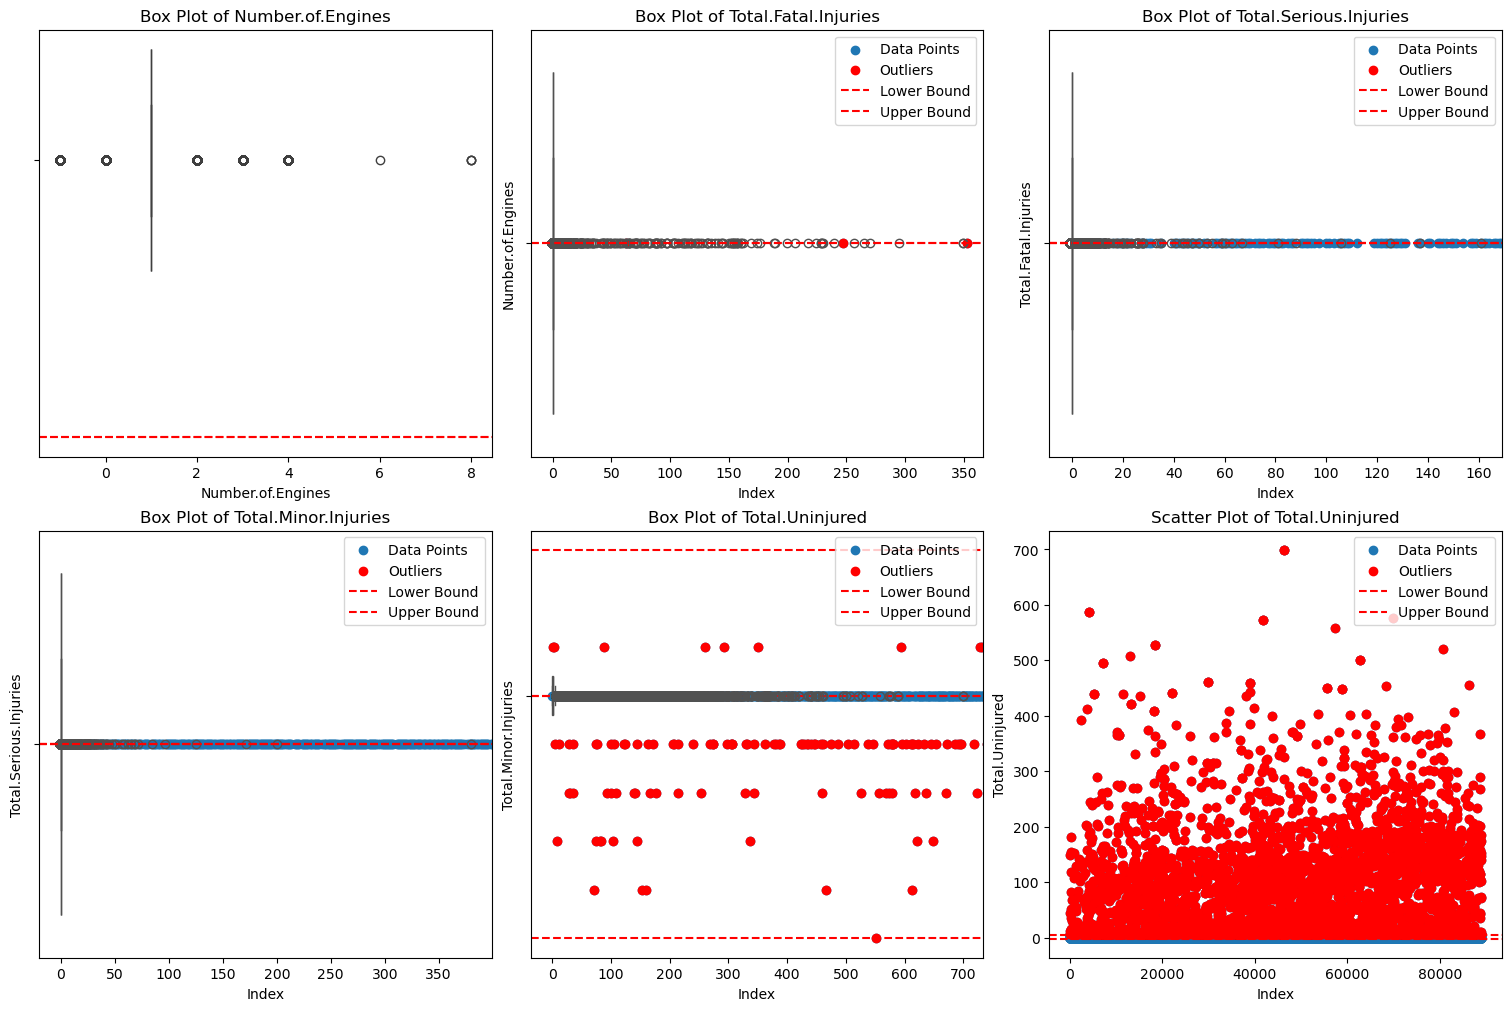

In [28]:
numerical_cols = df1.select_dtypes(include=[np.number]).columns

# Create a figure with a grid layout
num_cols = len(numerical_cols)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Adjust the number of rows for the grid
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(numerical_cols):
    # Identifying outliers using IQR
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]

    # Box plot with outliers
    sns.boxplot(x=df1[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
    axes[i].axhline(y=upper_bound, color='r', linestyle='--', label='Upper Bound')

    # Scatter plot highlighting outliers
    if i + 1 < len(axes):  # Ensure there's space for additional plots
        axes[i + 1].scatter(df1.index, df1[column], label='Data Points')
        axes[i + 1].scatter(outliers.index, outliers[column], color='red', label='Outliers')
        axes[i + 1].axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
        axes[i + 1].axhline(y=upper_bound, color='r', linestyle='--', label='Upper Bound')
        axes[i + 1].set_title(f'Scatter Plot of {column}')
        axes[i + 1].set_xlabel('Index')
        axes[i + 1].set_ylabel(column)
        axes[i + 1].legend()

# Hide any unused subplots
for j in range(i + 2, len(axes)):
    axes[j].axis('off')

plt.show()


## Handling the outliers by capping

Capping is a simple method to handle outliers by setting limits on the values in a dataset. Instead of removing outliers, you "cap" extreme values to a maximum or minimum threshold. 
Cap the Values:
Values below the lower limit are changed to the lower limit.
Values above the upper limit are changed to the upper limit.

In [29]:
# Outlier handling function
def handle_outliers(df):
    num_cols = len(df.select_dtypes(include=[np.number]).columns)
    num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Adjust the number of rows for the grid
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows), constrained_layout=True)
    
    axes = axes.flatten()
    
    # Plotting each column
    for i, column in enumerate(df.select_dtypes(include=[np.number]).columns):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Box Plot of {column} After Handling Outliers')
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.show()

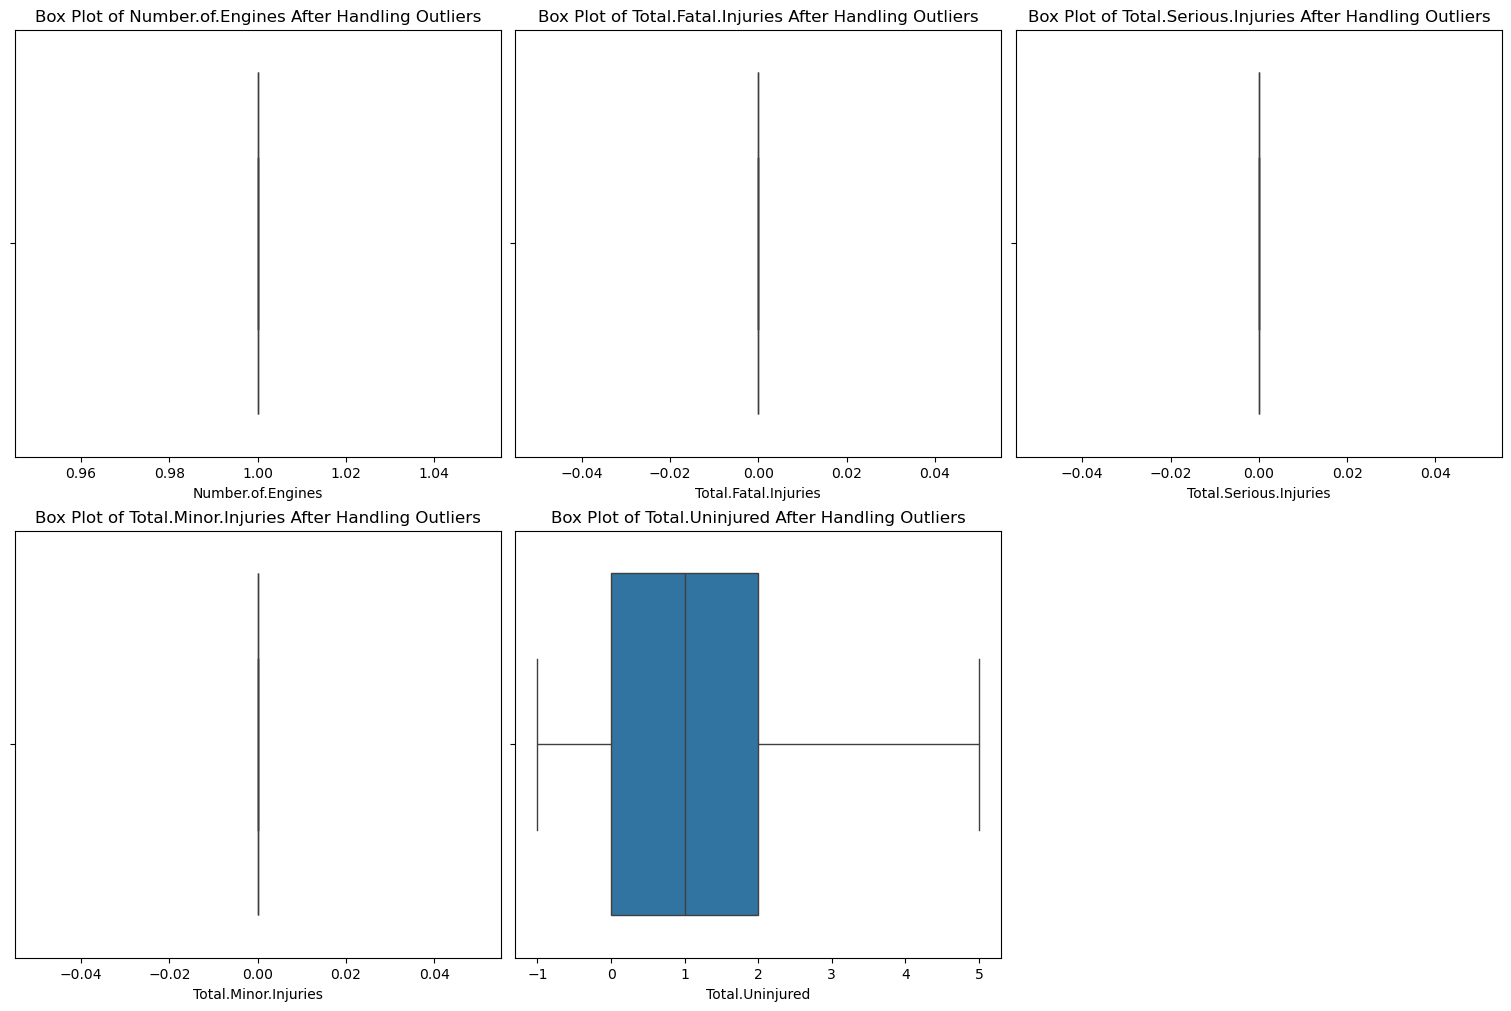

In [30]:
handle_outliers(df1)

## Distribution of injury severity

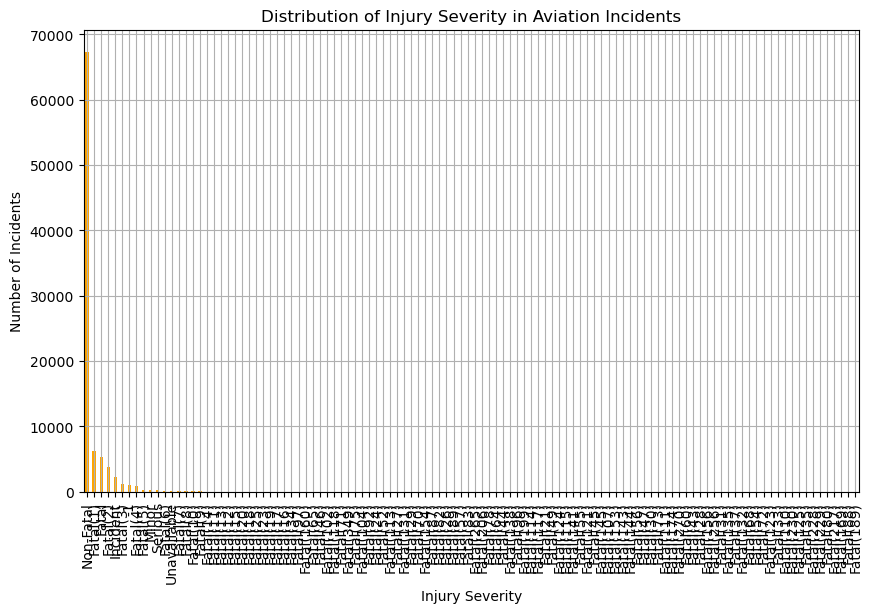

In [31]:
injury_severity_counts = df1['Injury.Severity'].value_counts()
plt.figure(figsize=(10, 6))
injury_severity_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Injury Severity in Aviation Incidents')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## Locations with the most aviation accidents

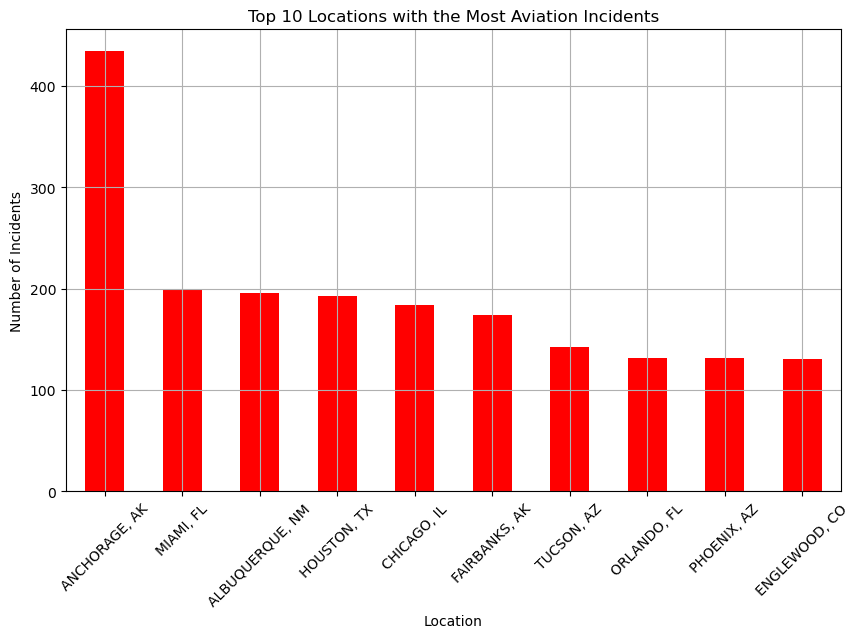

In [32]:
location_counts = df1['Location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='red')
plt.title('Top 10 Locations with the Most Aviation Incidents')
plt.xlabel('Location')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Number of aviation accidents according to years

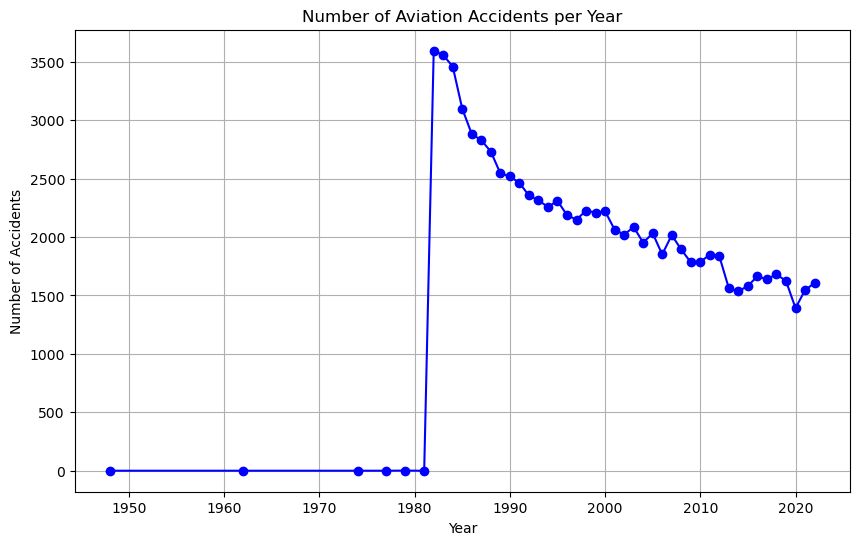

In [33]:
df1['Year'] = df1['Event.Date'].dt.year
accidents_per_year = df1.groupby('Year').size()
plt.figure(figsize=(10, 6))
accidents_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Number of Aviation Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

## Accident Count by Aircraft Type

In [34]:
df1['Aircraft.Type'] = df1['Make'] + ' ' + df1['Model']

In [35]:
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Aircraft.Type
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,-1,-1,Fatal(2),Destroyed,...,0.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,1969-12-31 23:59:59.999999999,1948,Stinson 108-3
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,-1,-1,Fatal(4),Destroyed,...,0.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19 00:00:00.000000000,1962,Piper PA24-180
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,-1,-1,Fatal(3),Destroyed,...,0.0,0.0,0.0,-1.0,IMC,Cruise,Probable Cause,2007-02-26 00:00:00.000000000,1974,Cessna 172M
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,-1,-1,Fatal(2),Destroyed,...,0.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09 00:00:00.000000000,1977,Rockwell 112
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,-1,-1,Fatal(1),Destroyed,...,0.0,0.0,0.0,0.0,VMC,Approach,Probable Cause,1980-04-16 00:00:00.000000000,1979,Cessna 501


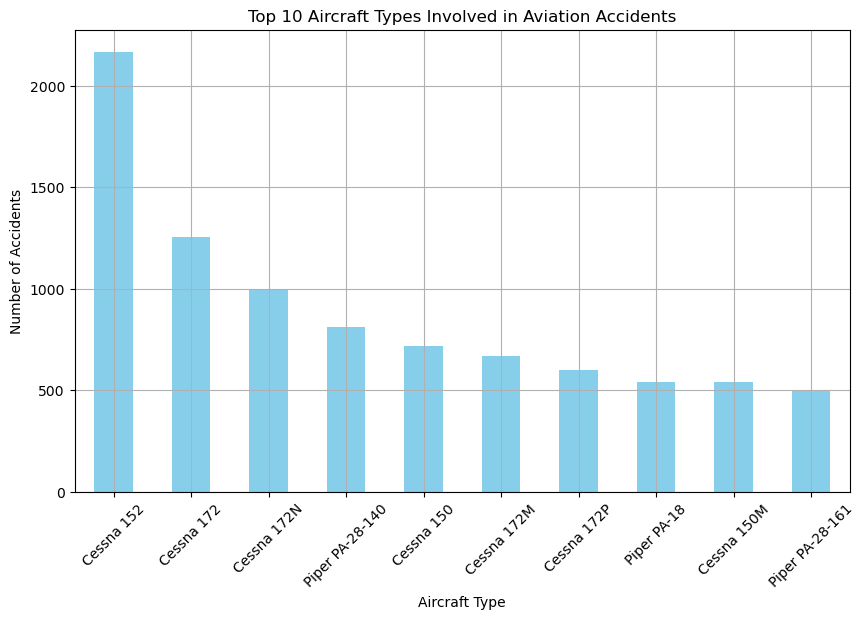

In [36]:
aircraft_accident_count = df1['Aircraft.Type'].value_counts()
plt.figure(figsize=(10, 6))
aircraft_accident_count.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Aircraft Types Involved in Aviation Accidents')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Severity of Accidents by Aircraft Type

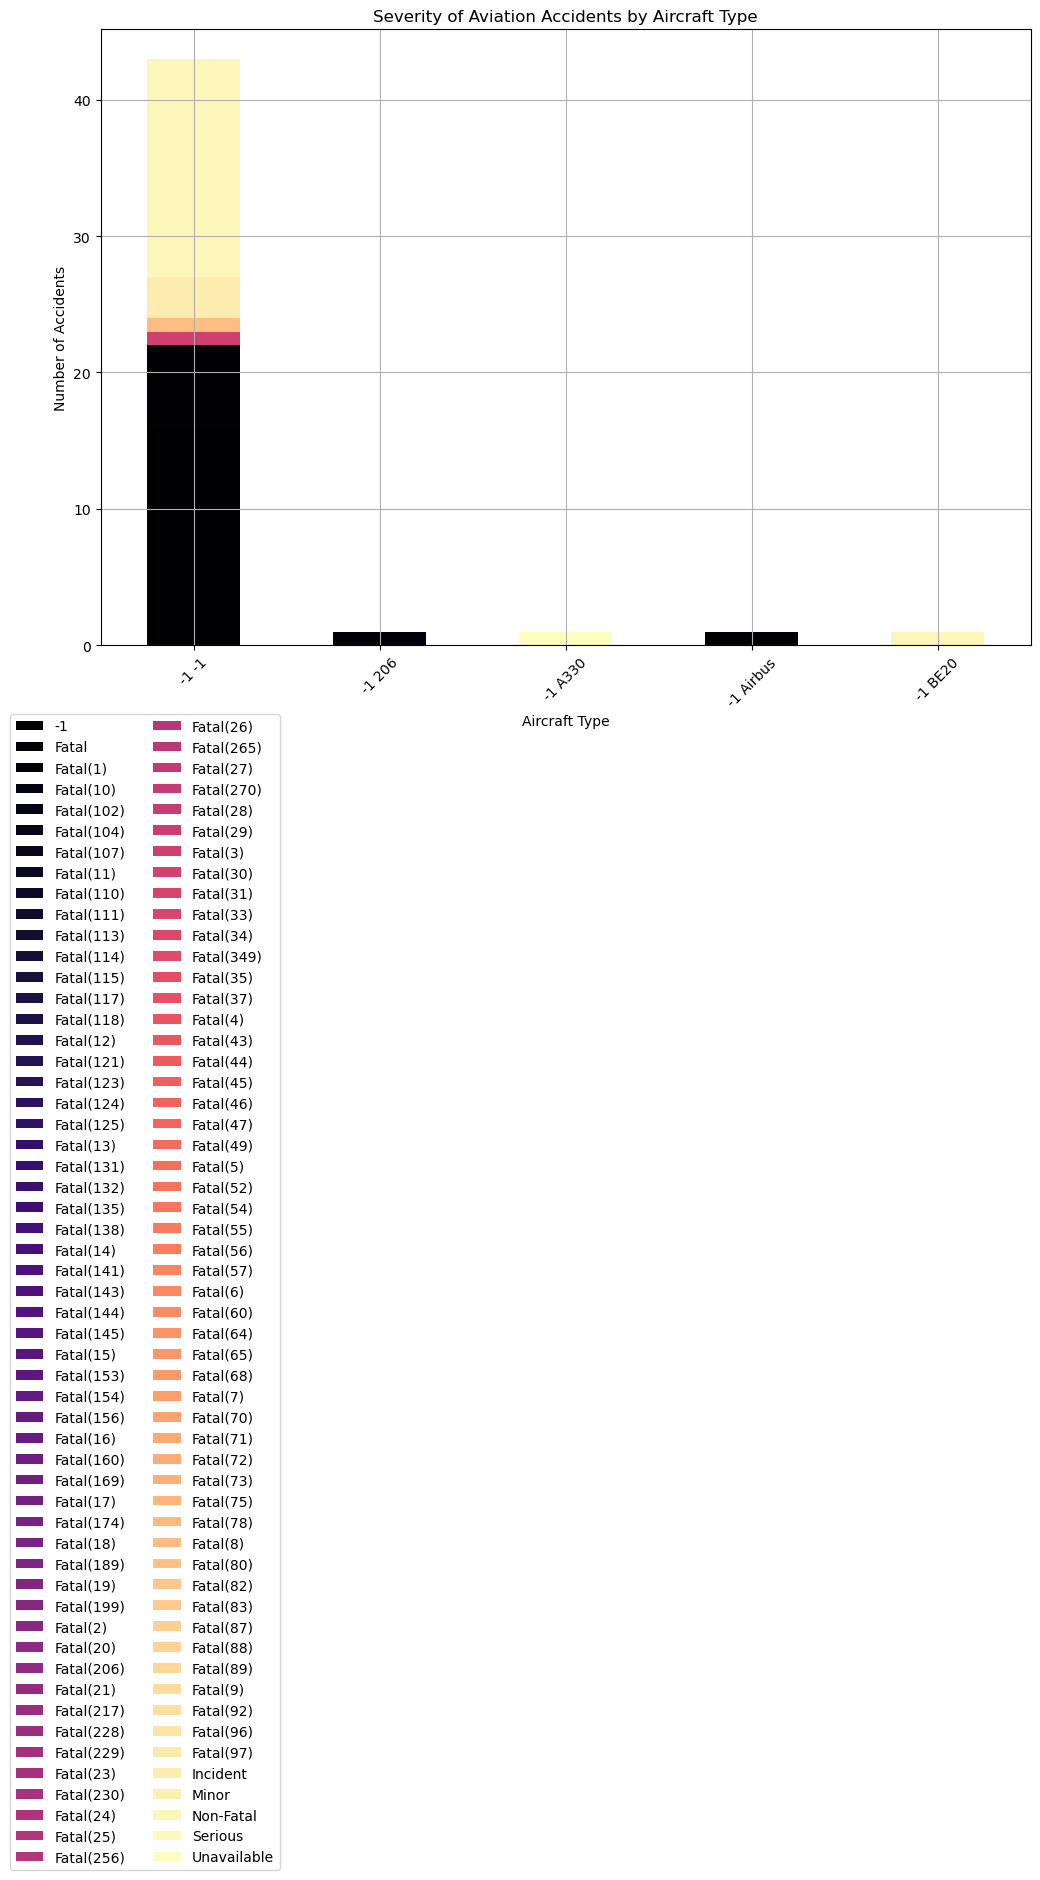

In [37]:
severity_by_aircraft = df1.groupby(['Aircraft.Type', 'Injury.Severity']).size().unstack(fill_value=0)
severity_by_aircraft.head(5).plot(kind='bar', stacked=True, figsize=(12, 8),colormap='magma')
plt.title('Severity of Aviation Accidents by Aircraft Type')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Injury Severity')
plt.grid(True)
plt.legend( bbox_to_anchor=(0.2, -0.1), ncol=2)
plt.show()

## Aircraft Damage by Aircrafft Type

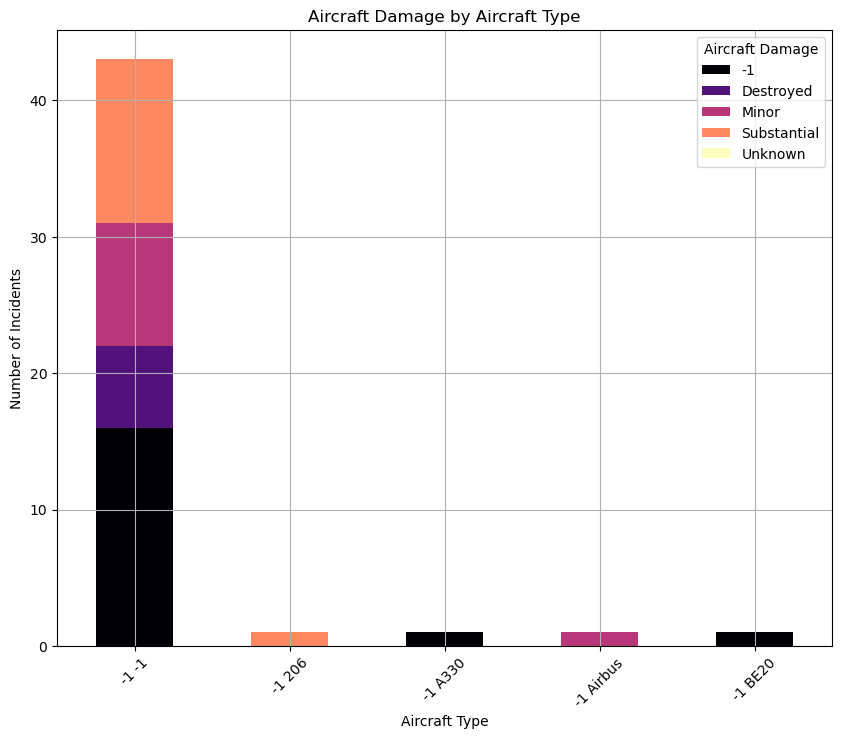

In [38]:
damage_by_aircraft = df1.groupby(['Aircraft.Type', 'Aircraft.damage']).size().unstack(fill_value=0)
damage_by_aircraft.head(5).plot(kind='bar', stacked=True, figsize=(10, 8), colormap='magma')
plt.title('Aircraft Damage by Aircraft Type')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Aircraft Damage')
plt.grid(True)
plt.show()

## Histogram of Total Fatal Injuries

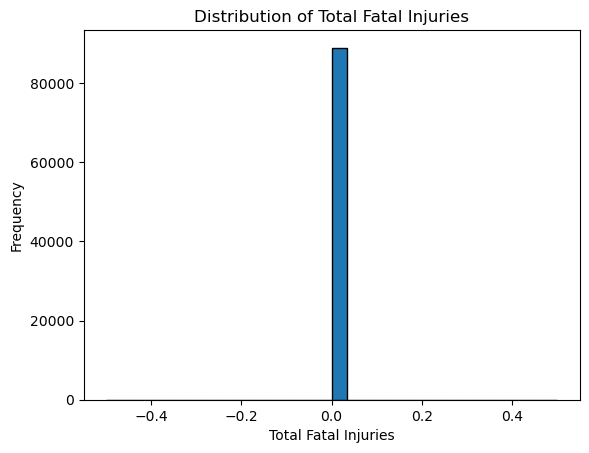

In [39]:
plt.hist(df1['Total.Fatal.Injuries'], bins=30, edgecolor='black')
plt.title('Distribution of Total Fatal Injuries')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Frequency')
plt.show()

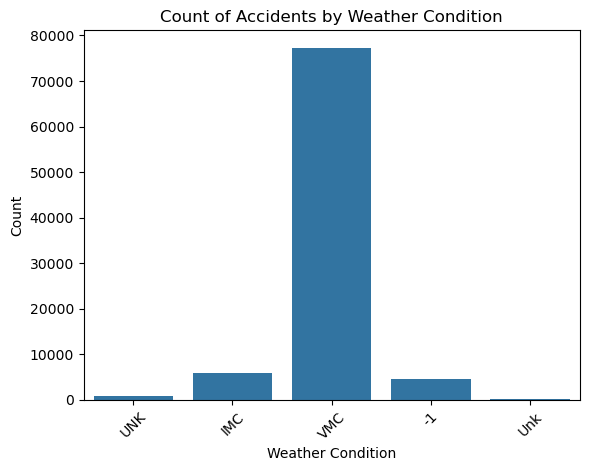

In [40]:
## Bar chart of Weather Conditions
sns.countplot(data=df1, x='Weather.Condition')
plt.title('Count of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Plots showing Distribution of total injuries by different aircraft types

In [41]:
df1['Total.Injuries'] = df1['Total.Fatal.Injuries'] + df1['Total.Serious.Injuries'] + df1['Total.Minor.Injuries'] + df1['Total.Uninjured']

# Find top 10 aircraft types with the highest total injuries
top_10_aircraft = df1.groupby('Make')['Total.Injuries'].sum().nlargest(10).index

# Filter the dataset for the top 10 aircraft types
filtered_df = df1[df1['Make'].isin(top_10_aircraft)]

## Box Plot

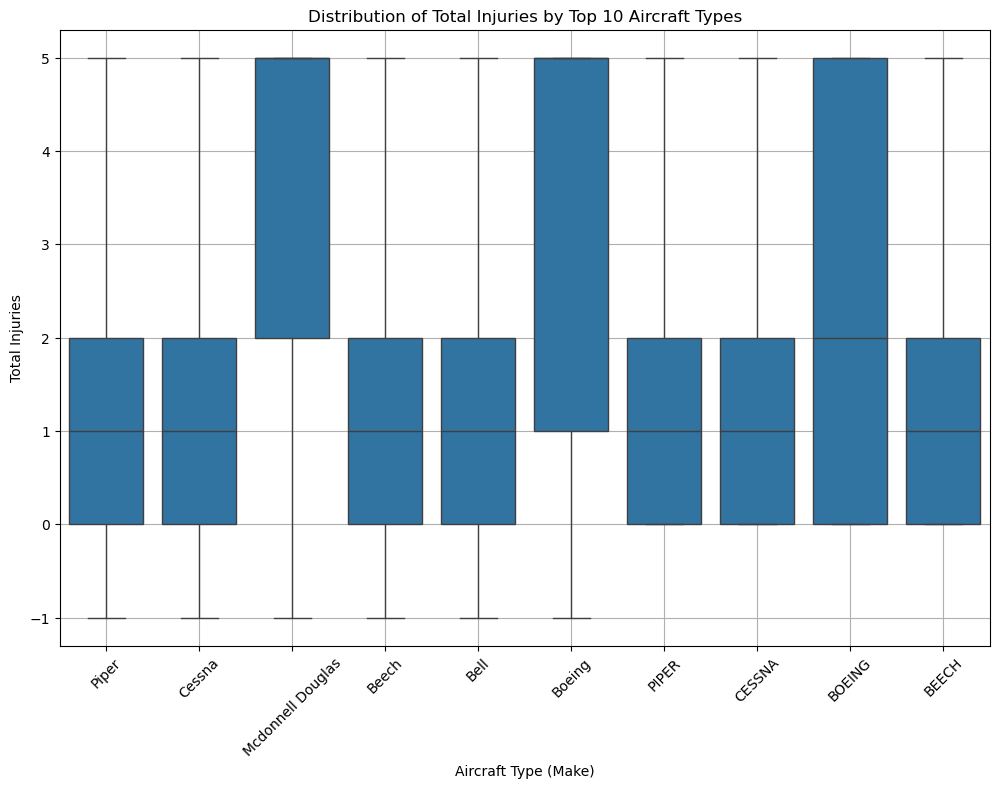

In [42]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='Make', y='Total.Injuries')
plt.title('Distribution of Total Injuries by Top 10 Aircraft Types')
plt.xlabel('Aircraft Type (Make)')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Bar Plot

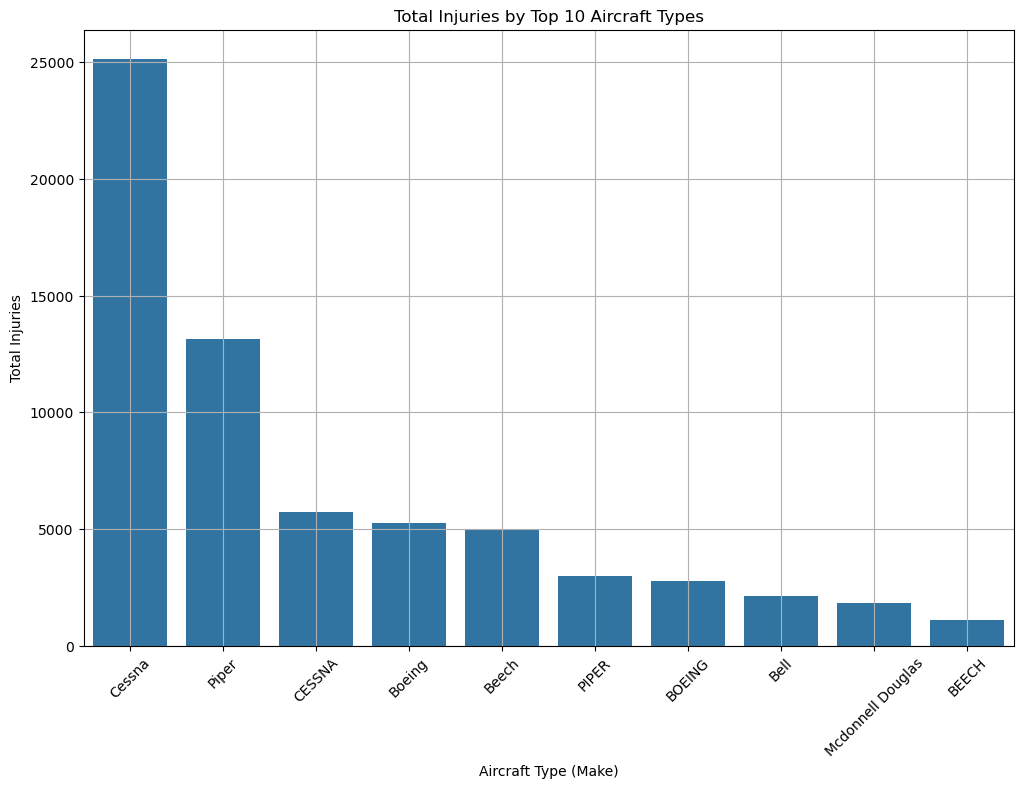

In [43]:
total_injuries = df1.groupby('Make')['Total.Injuries'].sum().reset_index()

# Get the top 10 aircraft types with the highest total injuries
top_10_aircraft = total_injuries.nlargest(10, 'Total.Injuries')

# Bar Plot of Total Injuries for Top 10 Aircraft Types
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_aircraft, x='Make', y='Total.Injuries')
plt.title('Total Injuries by Top 10 Aircraft Types')
plt.xlabel('Aircraft Type (Make)')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Box plot of distribution of injuries by purpose of flight

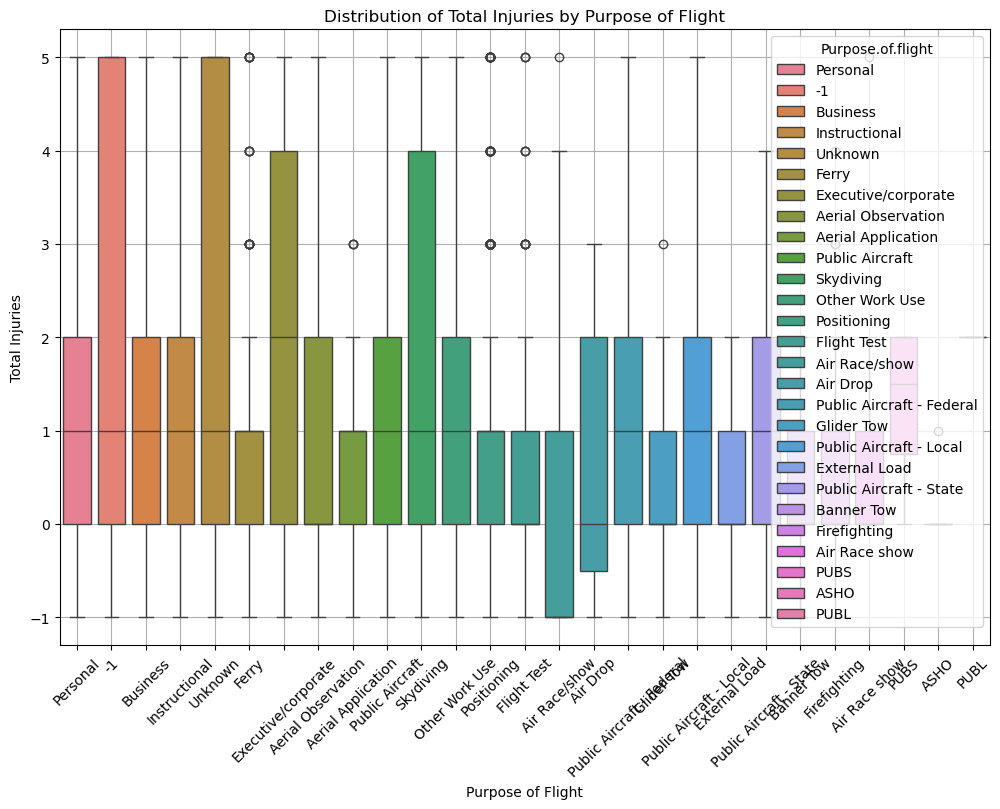

In [44]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1, x='Purpose.of.flight', y='Total.Injuries', hue='Purpose.of.flight')
plt.title('Distribution of Total Injuries by Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Recommendations

# Aircraft Types Involved in Aviation Accidents

The Visual Representation-Top 10 Aircraft Types Involved in Aviation Accidents

When considering aircraft types for purchase, the number of accidents involving each Aircraft is a critical factor. Based on accident data:

Recommendation:
The Piper PA-28-16 is recommended for purchase and use by the company for client travel. This recommendation is based on the declining number of accidents involving this model, as well as its overall lower accident frequency compared to the Cessna aircraft. This suggests that the Piper PA-28-16 may present a lower risk, making it a safer option for the company's operations.


# Aircraft Damage by Aircraft Type

The Visual Representation-Aircraft Damage by Aircraft Type

The Aircraft -1-1 has shown an increasing number of incidents, with significant damage across all levels. This trend indicates a higher risk of operational losses for the company, both in terms of financial impact and safety. As such, purchasing this aircraft is not advisable due to the potential for substantial losses.

Recommendation:
The company should instead focus on purchasing other aircraft types, such as the -1 206, -1 A330, -1 Airbus, and -1 BE20. These visuals have shown minimal damage in past incidents, indicating a lower risk of losses in terms of both aircraft and human safety. This would provide a more reliable and safer option for the company's operations.


# Injuries by Aircraft Types

The Visual Representation-(Distribution of Total Injuries by Top 10 Aircraft Types)

The Boeing aircraft make has recorded the highest number of total injuries (up to 5), which presents significant risks, including high operational costs, reduced client trust, and potentially no clients using the aircraft. This could negatively impact the company's revenue and reputation.

Recommendations:
Conduct Thorough Inspections
Prior to purchase and throughout the aircraft's service life, ensure that comprehensive safety inspections and performance tests are regularly carried out. Routine maintenance and safety checks can help minimize risks, protecting both the company and its passengers.

Customer-Centric Safety Assurance
Emphasize a strong commitment to safety in marketing and communication with clients. Offering reassurances through transparency on safety measures, maintenance schedules, and certifications can help rebuild or strengthen client trust, ensuring steady turnover and long-term loyalty.


## Conclusions

 Based on the box plot analysis, Personal Purpose and Executive/Corporate Purpose flights show some differences in injuries:
 
1.Executive/Corporate Purpose flights have a higher middle value for injuries, around 2, compared to Personal Purpose flights, which have a lower value around 1. This means that Executive/Corporate flights tend to have more injuries than Personal flights.

2.Range of Injuries for  the Personal Purpose flights it range is between 2 to 5, while for Executive/Corporate Purpose, they range between 4 to 5. This shows that Executive/Corporate flights usually experience more injuries.

3.Implication for Safety both flight types still show injury risks. Therefore, safety measures should be equally strong for both personal and executive/corporate flights to help lower the chance of injuries.

Both the Executive/Corporate flights have a higher risk of injuries than Personal Purpose flights, but both need strong safety measures.

